In [32]:
import math
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from datetime import datetime
from math import sqrt
from numpy import concatenate
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

In [33]:
data_1 = pd.read_csv('capstone_4.csv')
data_1

,Date,promotion_post,like,comment,share,save,product_page_views,product_button_click,profile_visits,web_clicks,...,is_profile_visits,is_websites_taps,is_sticker_taps,is_get_direction_button_taps,is_business_address_taps,is_reach,is_impression,is_follows,Quantity,Total
0,2019-07-01,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3490.0
1,2019-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
2,2019-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
3,2019-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1573.0
4,2019-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2021-05-27,0.0,21.0,0.0,1.0,4.0,7.0,0.0,20.0,2.0,...,1.0,1.0,0.0,0.0,0.0,1218.0,1247.0,0.0,10.0,4943.0
697,2021-05-28,0.0,7.0,0.0,0.0,2.0,7.0,0.0,4.0,0.0,...,8.0,3.0,0.0,0.0,0.0,1952.0,2020.0,0.0,10.0,4943.0
698,2021-05-29,0.0,8.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,1952.0,2020.0,0.0,10.0,4943.0
699,2021-05-30,0.0,4.0,0.0,1.0,2.0,7.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1470.3


In [34]:
data_xg = data_1[["Total", "share", "save", "product_page_views", "profile_visits", "reach", "total_imp", 
                    "imp_home", "imp_profile", "imp_hashtag", "imp_other", "imp_explore", "is_profile_visits", 
                    "is_websites_taps", "is_reach", "is_impression"]]

In [35]:
data_xg = data_xg.astype('float32')

#Normalise data for modelling 
scaler = MinMaxScaler(feature_range=(0, 1))
data_xg_norm = scaler.fit_transform(data_xg)

In [115]:
701 - 491

210

In [ ]:
# Current timestep

In [116]:
# select input and output variables - 1 lag

X_no = data_xg_norm[:,1:]
Y_no = data_xg_norm[:,0]

# select train(491) and test(210)

X_train_no = X_no[:491, :]
Y_train_no = Y_no[:491]

X_test_no = X_no[491:,:]
Y_test_no = Y_no[491:,]

In [119]:
xgb_reg_no = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg_no.fit(X_train_no, Y_train_no)
    
# Train Data
pred_X_no = xgb_reg_no.predict(X_train_no)
pred_X_no = pred_X_no.reshape(491,1)
    
inv_pred_X_no = concatenate((pred_X_no, data_xg_norm[:491, 1:]), axis=1)
inv_pred_X_no = scaler.inverse_transform(inv_pred_X_no)
inv_pred_X_no = inv_pred_X_no[:,0]

rmse_no_train = math.sqrt(mean_squared_error(data_xg_norm[:491, 0], inv_pred_X_no))

    
# Test Data
    
pred_X_no_test = xgb_reg_no.predict(X_test_no)
pred_X_no_test = pred_X_no_test.reshape(210,1)
    
inv_pred_X_no_test = concatenate((pred_X_no_test, data_xg_norm[491:, 1:]), axis=1)
inv_pred_X_no_test = scaler.inverse_transform(inv_pred_X_no_test)
inv_pred_X_no_test = inv_pred_X_no_test[:,0]

rmse_test = math.sqrt(mean_squared_error(data_xg_norm[491:,0], inv_pred_X_no_test))
    
print("Train RMSE:", rmse_train, "Test RMSE", rmse_test)

Train RMSE: 2819.6792370764447 Test RMSE 2386.7173062597926


In [123]:
mae_train_no = mae(data_xg_norm[:491, 0], inv_pred_X_no)
mae_test_no = mae(data_xg_norm[491:,0], inv_pred_X_no_test)

print("Train:",mae_train_no, "Test:", mae_test_no)

Train: 2811.2444 Test: 2376.7188


In [36]:
# Function to convert series to supervised learning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [37]:
#LAG-1 Model

In [38]:
#transforming data into a supervised series
reframed_lag1 = series_to_supervised(data_xg_norm, 1, 1)
reframed_lag1.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)', 'var13(t)', 'var14(t)', 'var15(t)', 'var16(t)'],
      dtype='object')

In [40]:
#setting partition parameters
train_lag1 = round(reframed_lag1.shape[0]*0.7) 
test_lag1 = reframed_lag1.shape[0] - train_lag1

#feature selection
values_lag1 = reframed_lag1.values

# 1 lag
lag_1 = values_lag1[:,:-15]

In [41]:
# select input and output variables - 1 lag

X = lag_1[:,:-1]
Y = lag_1[:,-1]

# select train(490) and test(210)

X_train = X[:train_lag1, :]
Y_train = Y[:train_lag1]

X_test = X[train_lag1:,:]
Y_test = Y[train_lag1:,]

In [42]:
type(X_train)

numpy.ndarray

In [43]:
#Build XGBoost Model

# Number of trees
n_estimators = [500,1000,2000]

# Maximum number of levels in tree
max_depth = [10,20,100]

#minimum sum of weights of all observations required in a child
min_child_weight = [1,2,3]

#Gamma specifies the minimum loss reduction required to make a split
gamma = [1,5,10]

# boosting learning rate
learning_rate = [.1,.05,.01]

In [44]:
xgb_Test_Accuracy_Data = pd.DataFrame(columns = ['n_estimators','max_depth','min_child_weight','gamma','learning_rate','Train Accuracy','Test Accuracy'])

for x in list(itertools.product(n_estimators, max_depth, min_child_weight, gamma, learning_rate)):
    xgb_reg = xgb.XGBRegressor(n_estimators=x[0],max_depth =x[1],min_child_weight = x[2], 
                               gamma = x[3],learning_rate = x[4])
    xgb_reg.fit(X_train, Y_train)
    
    # Train Data
    pred_X = xgb_reg.predict(X_train)
    pred_X = pred_X.reshape(490,1)
    
    inv_pred_X = concatenate((pred_X, data_xg_norm[1:train_lag1 + 1, 1:]), axis=1)
    inv_pred_X = scaler.inverse_transform(inv_pred_X)
    inv_pred_X = inv_pred_X[:,0]

    rmse_train = math.sqrt(mean_squared_error(data_xg_norm[1:train_lag1 + 1, 0], inv_pred_X))
    
    # Use the forest's predict method on the train data
    #predictions_train = xgb_reg.predict(X_train)
    #predictions_train = predictions_train.reshape(490,1)
    #predictions_train = scaler.inverse_transform(predictions_train)
    #Absolute errors
    #errors_train = abs(predictions_train - Y_train)
    # Calculate mean absolute percentage error (MAPE)
    #mape_train = 100 * (errors_train / Y_train)
    #Calculate and display accuracy
    #accuracy_train = 100 - np.mean(mape_train)
    #Y_train = scaler.inverse_transform(Y_train)
    #rmse_train = math.sqrt(mean_squared_error(Y_train, predictions_train))
    
    # Test Data
    
    pred_X_test = xgb_reg.predict(X_test)
    pred_X_test = pred_X_test.reshape(210,1)
    
    inv_pred_X_test = concatenate((pred_X_test, data_xg_norm[train_lag1 + 1:, 1:]), axis=1)
    inv_pred_X_test = scaler.inverse_transform(inv_pred_X_test)
    inv_pred_X_test = inv_pred_X_test[:,0]

    rmse_test = math.sqrt(mean_squared_error(data_xg_norm[train_lag1 + 1:,0], inv_pred_X_test))
    
    # Use the forest's predict method on the test data
    #predictions_test = xgb_reg.predict(X_test)
    #predictions_test = predictions_test.reshape(210,1)   
    #predictions_test = scaler.inverse_transform(predictions_test)
    # Calculate the absolute errors
    #errors_test = abs(predictions_test - Y_test)
    # Calculate mean absolute percentage error (MAPE)
    #mape_test = 100 * (errors_test/ Y_test)
    # Calculate and display accuracy
    #accuracy_test = 100 - np.mean(mape_test)
    #Y_test = scaler.inverse_transform(Y_test)
    #rmse_test = math.sqrt(mean_squared_error(Y_test, predictions_test))
    
    xgb_Test_Accuracy_Data_One = pd.DataFrame(index = range(1), columns = ['n_estimators','max_depth','min_child_weight',
                                                                       'gamma','learning_rate','Train Accuracy',
                                                                       'Test Accuracy'])
    xgb_Test_Accuracy_Data_One.loc[:,'n_estimators'] = x[0]
    xgb_Test_Accuracy_Data_One.loc[:,'max_depth'] = x[1]
    xgb_Test_Accuracy_Data_One.loc[:,'min_child_weight'] = x[2]
    xgb_Test_Accuracy_Data_One.loc[:,'gamma'] = x[3]
    xgb_Test_Accuracy_Data_One.loc[:,'learning_rate'] = x[4]
    xgb_Test_Accuracy_Data_One.loc[:,'Train Accuracy'] = rmse_train
    xgb_Test_Accuracy_Data_One.loc[:,'Test Accuracy'] = rmse_test

    xgb_Test_Accuracy_Data = xgb_Test_Accuracy_Data.append(xgb_Test_Accuracy_Data_One)
            
xgb_Test_Accuracy_Data

KeyboardInterrupt: 

In [45]:
xgb_reg = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg.fit(X_train, Y_train)
    
# Train Data
pred_X = xgb_reg.predict(X_train)
pred_X = pred_X.reshape(490,1)
    
inv_pred_X = concatenate((pred_X, data_xg_norm[1:train_lag1 + 1, 1:]), axis=1)
inv_pred_X = scaler.inverse_transform(inv_pred_X)
inv_pred_X = inv_pred_X[:,0]

rmse_train = math.sqrt(mean_squared_error(data_xg_norm[1:train_lag1 + 1, 0], inv_pred_X))

    
# Test Data
    
pred_X_test = xgb_reg.predict(X_test)
pred_X_test = pred_X_test.reshape(210,1)
    
inv_pred_X_test = concatenate((pred_X_test, data_xg_norm[train_lag1 + 1:, 1:]), axis=1)
inv_pred_X_test = scaler.inverse_transform(inv_pred_X_test)
inv_pred_X_test = inv_pred_X_test[:,0]

rmse_test = math.sqrt(mean_squared_error(data_xg_norm[train_lag1 + 1:,0], inv_pred_X_test))
    
print("Train RMSE:", rmse_train, "Test RMSE", rmse_test)

Train RMSE: 2850.2395513359925 Test RMSE 2303.544442809819


In [46]:
mae_train = mae(data_xg_norm[1:train_lag1 + 1, 0], inv_pred_X)
mae_test = mae(data_xg_norm[train_lag1 + 1:,0], inv_pred_X_test)

print("Train:",mae_train, "Test:", mae_test)

Train: 2809.8606 Test: 2296.2246


In [47]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import plot_tree

In [49]:
#Best parameters for XGBoost model

best_fit_model = xgb_Test_Accuracy_Data.loc[xgb_Test_Accuracy_Data['Test Accuracy'] == min(xgb_Test_Accuracy_Data['Test Accuracy'])]
best_fit_model

,n_estimators,max_depth,min_child_weight,gamma,learning_rate,Train Accuracy,Test Accuracy
0,500,10,1,1,0.1,2850.239551,2303.544443
0,500,10,2,1,0.1,2850.239551,2303.544443
0,500,10,3,1,0.1,2850.239551,2303.544443
0,500,20,1,1,0.1,2850.239551,2303.544443
0,500,20,2,1,0.1,2850.239551,2303.544443
0,500,20,3,1,0.1,2850.239551,2303.544443
0,500,100,1,1,0.1,2850.239551,2303.544443
0,500,100,2,1,0.1,2850.239551,2303.544443
0,500,100,3,1,0.1,2850.239551,2303.544443
0,1000,10,1,1,0.1,2850.239551,2303.544443


In [50]:
#Lag-2 Model

In [51]:
reframed_lag2 = series_to_supervised(data_xg_norm, 2, 1)
reframed_lag2.columns

train_lag2 = round(reframed_lag2.shape[0]*0.7) 
test_lag2 = reframed_lag2.shape[0] - train_lag2

values_lag2 = reframed_lag2.values

# 2 lags
lag_2 = values_lag2[:, :-15]

# select input and output variables - 2 lag
X2 = lag_2[:,:-1]
Y2 = lag_2[:,-1]

# select train(489) and test(210)

X2_train = X2[:train_lag2, :]
Y2_train = Y2[:train_lag2]

X2_test = X2[train_lag2:,:]
Y2_test = Y2[train_lag2:,]

In [52]:
xgb_reg2 = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg2.fit(X2_train, Y2_train)
    
# Train Data
pred_X2 = xgb_reg2.predict(X2_train)
pred_X2 = pred_X2.reshape(489,1)
    
inv_pred_X2 = concatenate((pred_X2, data_xg_norm[2:train_lag2 + 2, 1:]), axis=1)
inv_pred_X2 = scaler.inverse_transform(inv_pred_X2)
inv_pred_X2 = inv_pred_X2[:,0]

rmse_train2 = math.sqrt(mean_squared_error(data_xg_norm[2:train_lag2 + 2, 0], inv_pred_X2))
    
# Test Data
    
pred_X2_test = xgb_reg2.predict(X2_test)
pred_X2_test = pred_X2_test.reshape(210,1)
    
inv_pred_X2_test = concatenate((pred_X2_test, data_xg_norm[train_lag2 + 2:, 1:]), axis=1)
inv_pred_X2_test = scaler.inverse_transform(inv_pred_X2_test)
inv_pred_X2_test = inv_pred_X2_test[:,0]

rmse_test2 = math.sqrt(mean_squared_error(data_xg_norm[train_lag2 + 2:,0], inv_pred_X2_test))

print(rmse_train2, rmse_test2)

2854.5019705720997 2291.311851320112


In [53]:
mae2_train = mae(data_xg_norm[2:train_lag2 + 2, 0], inv_pred_X2)
mae2_test = mae(data_xg_norm[train_lag2 + 2:,0], inv_pred_X2_test)

print("Train:",mae2_train, "Test:", mae2_test)

Train: 2805.5005 Test: 2280.7937


In [54]:
#Lag3 XGBoost model 

In [55]:
reframed_lag3 = series_to_supervised(data_xg_norm, 3, 1)
reframed_lag3.columns

Index(['var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)',
       'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var9(t-3)', 'var10(t-3)',
       'var11(t-3)', 'var12(t-3)', 'var13(t-3)', 'var14(t-3)', 'var15(t-3)',
       'var16(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)',
       'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)',
       'var10(t-2)', 'var11(t-2)', 'var12(t-2)', 'var13(t-2)', 'var14(t-2)',
       'var15(t-2)', 'var16(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)',
       'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)',
       'var9(t-1)', 'var10(t-1)', 'var11(t-1)', 'var12(t-1)', 'var13(t-1)',
       'var14(t-1)', 'var15(t-1)', 'var16(t-1)', 'var1(t)', 'var2(t)',
       'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)',
       'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)', 'var14(t)',
       'var15(t)', 'var16(t)'],
      dtype='object')

In [56]:
train_lag3 = round(reframed_lag3.shape[0]*0.7) 
test_lag3 = reframed_lag3.shape[0] - train_lag3

# feature selection 
values_lag3 = reframed_lag3.values

# 3 lag
lag_3 = values_lag3[:,:-15]

print(train_lag3, test_lag3)

489 209


In [57]:
# select input and output variables - 1 lag

X3 = lag_3[:,:-1]
Y3 = lag_3[:,-1]

# select train(489) and test(209)

X3_train = X3[:train_lag3, :]
Y3_train = Y3[:train_lag3]

X3_test = X3[train_lag3:,:]
Y3_test = Y3[train_lag3:,]

In [58]:
xgb_reg3 = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg3.fit(X3_train, Y3_train)
    
# Train Data
pred_X3 = xgb_reg3.predict(X3_train)
pred_X3 = pred_X3.reshape(489,1)
    
inv_pred_X3 = concatenate((pred_X3, data_xg_norm[3:train_lag3 + 3, 1:]), axis=1)
inv_pred_X3 = scaler.inverse_transform(inv_pred_X3)
inv_pred_X3 = inv_pred_X3[:,0]

rmse_train3 = math.sqrt(mean_squared_error(data_xg_norm[3:train_lag3 + 3, 0], inv_pred_X3))
    
# Test Data
    
pred_X3_test = xgb_reg3.predict(X3_test)
pred_X3_test = pred_X3_test.reshape(209,1)
    
inv_pred_X3_test = concatenate((pred_X3_test, data_xg_norm[train_lag3 + 3:, 1:]), axis=1)
inv_pred_X3_test = scaler.inverse_transform(inv_pred_X3_test)
inv_pred_X3_test = inv_pred_X3_test[:,0]

rmse_test3 = math.sqrt(mean_squared_error(data_xg_norm[train_lag3 + 3:,0], inv_pred_X3_test))
        
print(rmse_train3, rmse_test3)

2858.0102344113466 2244.109845796324


In [59]:
mae3_train = mae(data_xg_norm[3:train_lag3 + 3, 0], inv_pred_X3)
mae3_test = mae(data_xg_norm[train_lag3 + 3:,0], inv_pred_X3_test)

print("Train:",mae3_train, "Test:", mae3_test)

Train: 2799.092 Test: 2230.5403


In [60]:
#Lag4 XGBoost model 

In [61]:
reframed_lag4 = series_to_supervised(data_xg_norm, 4, 1)
reframed_lag4.columns

Index(['var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)',
       'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var9(t-4)', 'var10(t-4)',
       'var11(t-4)', 'var12(t-4)', 'var13(t-4)', 'var14(t-4)', 'var15(t-4)',
       'var16(t-4)', 'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)',
       'var5(t-3)', 'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var9(t-3)',
       'var10(t-3)', 'var11(t-3)', 'var12(t-3)', 'var13(t-3)', 'var14(t-3)',
       'var15(t-3)', 'var16(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)',
       'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)',
       'var9(t-2)', 'var10(t-2)', 'var11(t-2)', 'var12(t-2)', 'var13(t-2)',
       'var14(t-2)', 'var15(t-2)', 'var16(t-2)', 'var1(t-1)', 'var2(t-1)',
       'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)',
       'var8(t-1)', 'var9(t-1)', 'var10(t-1)', 'var11(t-1)', 'var12(t-1)',
       'var13(t-1)', 'var14(t-1)', 'var15(t-1)', 'var16(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)'

In [62]:
train_lag4 = round(reframed_lag3.shape[0]*0.7) 
test_lag4 = reframed_lag4.shape[0] - train_lag4

# feature selection 
values_lag4 = reframed_lag4.values

# 4 lag
lag_4 = values_lag4[:,:-15]

print(train_lag4, test_lag4)

489 208


In [63]:
# select input and output variables - 1 lag

X4 = lag_4[:,:-1]
Y4 = lag_4[:,-1]

# select train(489) and test(209)

X4_train = X4[:train_lag4, :]
Y4_train = Y4[:train_lag4]

X4_test = X4[train_lag4:,:]
Y4_test = Y4[train_lag4:,]

In [64]:
xgb_reg4 = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg4.fit(X4_train, Y4_train)
    
# Train Data
pred_X4 = xgb_reg4.predict(X4_train)
pred_X4 = pred_X4.reshape(489,1)
    
inv_pred_X4 = concatenate((pred_X4, data_xg_norm[4:train_lag4 + 4, 1:]), axis=1)
inv_pred_X4 = scaler.inverse_transform(inv_pred_X4)
inv_pred_X4 = inv_pred_X4[:,0]

rmse_train4 = math.sqrt(mean_squared_error(data_xg_norm[4:train_lag4 + 4, 0], inv_pred_X3))
    
# Test Data
    
pred_X4_test = xgb_reg4.predict(X4_test)
pred_X4_test = pred_X4_test.reshape(208,1)
    
inv_pred_X4_test = concatenate((pred_X4_test, data_xg_norm[train_lag4 + 4:, 1:]), axis=1)
inv_pred_X4_test = scaler.inverse_transform(inv_pred_X4_test)
inv_pred_X4_test = inv_pred_X4_test[:,0]

rmse_test4 = math.sqrt(mean_squared_error(data_xg_norm[train_lag4 + 4:,0], inv_pred_X4_test))
        
print(rmse_train4, rmse_test4)

2858.0286037756864 2332.622022531726


In [65]:
mae4_train = mae(data_xg_norm[4:train_lag4 + 4, 0], inv_pred_X4)
mae4_test = mae(data_xg_norm[train_lag4 + 4:,0], inv_pred_X4_test)

print("Train:",mae4_train, "Test:", mae4_test)

Train: 2805.9824 Test: 2321.139


In [66]:
#Univariate Model

In [101]:
#feature selection 
reframed_uni = reframed_lag1.iloc[:,[0,16]]
reframed_uni

,var1(t-1),var1(t)
1,0.706049,1.000000
2,1.000000,1.000000
3,1.000000,0.318228
4,0.318228,1.000000
5,1.000000,1.000000
...,...,...
696,1.000000,1.000000
697,1.000000,1.000000
698,1.000000,1.000000
699,1.000000,0.297451


In [102]:
#feature selection
values_uni = reframed_uni.values

# select input and output variables - 1 lag

X = values_uni[:,:-1]
Y = values_uni[:,-1]

# select train(490) and test(210)

X_train = X[:train_lag1, :]
Y_train = Y[:train_lag1]

X_test = X[train_lag1:,:]
Y_test = Y[train_lag1:,]

In [103]:
xgb_reg_uni = xgb.XGBRegressor(n_estimators=500, max_depth =10, min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_reg_uni.fit(X_train, Y_train)
    
# Train Data
pred_X = xgb_reg_uni.predict(X_train)
pred_X = pred_X.reshape(490,1)
    
inv_pred_X = concatenate((pred_X, data_xg_norm[1:train_lag1 + 1, 1:]), axis=1)
inv_pred_X = scaler.inverse_transform(inv_pred_X)
inv_pred_X = inv_pred_X[:,0]

rmse_train = math.sqrt(mean_squared_error(data_xg_norm[1:train_lag1 + 1, 0], inv_pred_X))
    
# Test Data    
pred_X_test = xgb_reg_uni.predict(X_test)
pred_X_test = pred_X_test.reshape(210,1)
    
inv_pred_X_test = concatenate((pred_X_test, data_xg_norm[train_lag1 + 1:, 1:]), axis=1)
inv_pred_X_test = scaler.inverse_transform(inv_pred_X_test)
inv_pred_X_test = inv_pred_X_test[:,0]

rmse_test = math.sqrt(mean_squared_error(data_xg_norm[train_lag1 + 1:,0], inv_pred_X_test))

print(rmse_train, rmse_test)

2819.6792370764447 2741.015687660324


In [104]:
mae5_train = mae(data_xg_norm[1:train_lag1 + 1, 0], inv_pred_X)
mae5_test = mae(data_xg_norm[train_lag1 + 1:,0], inv_pred_X_test)

print("Train:",mae5_train, "Test:", mae5_test)

Train: 2809.8606 Test: 2729.1672


In [71]:
#Univariate Model 2

In [105]:
#feature selection 
reframed_uni2 = reframed_lag2.iloc[:,[0,16,32]]

In [106]:
#feature selection
values_uni2 = reframed_uni2.values

# select input and output variables - 1 lag

X2_uni = values_uni2[:,:-1]
Y2_uni = values_uni2[:,-1]

# select train(490) and test(210)

X2_uni_train = X2_uni[:train_lag2, :]
Y2_uni_train = Y2_uni[:train_lag2]

X2_uni_test = X2_uni[train_lag2:,:]
Y2_uni_test = Y2_uni[train_lag2:,]

In [107]:
xgb_uni_reg2 = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_uni_reg2.fit(X2_uni_train, Y2_uni_train)
    
# Train Data
pred_uni_X2 = xgb_uni_reg2.predict(X2_uni_train)
pred_uni_X2 = pred_uni_X2.reshape(489,1)
    
inv_pred_uni_X2 = concatenate((pred_uni_X2, data_xg_norm[2:train_lag2 + 2, 1:]), axis=1)
inv_pred_uni_X2 = scaler.inverse_transform(inv_pred_uni_X2)
inv_pred_uni_X2 = inv_pred_uni_X2[:,0]

rmse_uni_train2 = math.sqrt(mean_squared_error(data_xg_norm[2:train_lag2 + 2, 0], inv_pred_uni_X2))
    
# Test Data
    
pred_X2_uni_test = xgb_uni_reg2.predict(X2_uni_test)
pred_X2_uni_test = pred_X2_uni_test.reshape(210,1)
    
inv_pred_X2_uni_test = concatenate((pred_X2_uni_test, data_xg_norm[train_lag2 + 2:, 1:]), axis=1)
inv_pred_X2_uni_test = scaler.inverse_transform(inv_pred_X2_uni_test)
inv_pred_X2_uni_test = inv_pred_X2_uni_test[:,0]

rmse_uni_test2 = math.sqrt(mean_squared_error(data_xg_norm[train_lag2 + 2:,0], inv_pred_X2_uni_test))

print(rmse_uni_train2, rmse_uni_test2)

2820.9918468510327 2711.156487552867


In [108]:
mae2_uni_train = mae(data_xg_norm[2:train_lag2 + 2, 0], inv_pred_uni_X2)
mae2_uni_test = mae(data_xg_norm[train_lag2 + 2:,0], inv_pred_X2_uni_test)

print("Train:",mae2_uni_train, "Test:", mae2_uni_test)

Train: 2805.5005 Test: 2693.6252


In [76]:
#Univariate Model 3

In [99]:
#feature selection 
reframed_uni3 = reframed_lag3.iloc[:,[0,16,32,48]]

In [100]:
reframed_uni3.columns

Index(['var1(t-3)', 'var1(t-2)', 'var1(t-1)', 'var1(t)'], dtype='object')

In [79]:
train_lag3 = round(reframed_lag3.shape[0]*0.7) 
test_lag3 = reframed_lag3.shape[0] - train_lag3

# feature selection 
values_uni3 = reframed_uni3.values


In [80]:
# select input and output variables - 1 lag

X3_uni = values_uni3[:,:-1]
Y3_uni = values_uni3[:,-1]

# select train(489) and test(209)

X3_uni_train = X3_uni[:train_lag3, :]
Y3_uni_train = Y3_uni[:train_lag3]

X3_uni_test = X3_uni[train_lag3:,:]
Y3_uni_test = Y3_uni[train_lag3:,]

In [81]:
list_3 = ['var1(t-3)', 'var1(t-2)', 'var1(t-1)']

In [82]:
xgb_uni_reg3 = xgb.XGBRegressor(n_estimators=500,max_depth =10,min_child_weight = 1, 
                               gamma = 1,learning_rate = 0.1)
xgb_uni_reg3.fit(X3_uni_train, Y3_uni_train)
xgb_uni_reg3.feature_names = list_3
    
# Train Data
pred_uni_X3 = xgb_uni_reg3.predict(X3_uni_train)
pred_uni_X3 = pred_uni_X3.reshape(489,1)
    
inv_pred_uni_X3 = concatenate((pred_uni_X3, data_xg_norm[3:train_lag3 + 3, 1:]), axis=1)
inv_pred_uni_X3 = scaler.inverse_transform(inv_pred_uni_X3)
inv_pred_uni_X3 = inv_pred_uni_X3[:,0]

rmse_train_uni3 = math.sqrt(mean_squared_error(data_xg_norm[3:train_lag3 + 3, 0], inv_pred_uni_X3))
    
# Test Data
    
pred_X3_uni_test = xgb_uni_reg3.predict(X3_uni_test)
pred_X3_uni_test = pred_X3_uni_test.reshape(209,1)
    
inv_pred_X3_uni_test = concatenate((pred_X3_uni_test, data_xg_norm[train_lag3 + 3:, 1:]), axis=1)
inv_pred_X3_uni_test = scaler.inverse_transform(inv_pred_X3_uni_test)
inv_pred_X3_uni_test = inv_pred_X3_uni_test[:,0]

rmse_test_uni3 = math.sqrt(mean_squared_error(data_xg_norm[train_lag3 + 3:,0], inv_pred_X3_uni_test))
        
print(rmse_train_uni3, rmse_test_uni3)

2817.696488268387 2694.161743474211


In [83]:
xgb_uni_reg3.feature_names

['var1(t-3)', 'var1(t-2)', 'var1(t-1)']

In [84]:
mae3_uni_train = mae(data_xg_norm[3:train_lag3 + 3, 0], inv_pred_uni_X3)
mae3_uni_test = mae(data_xg_norm[train_lag3 + 3:,0], inv_pred_X3_uni_test)

print("Train:",mae3_uni_train, "Test:", mae3_uni_test)

Train: 2799.092 Test: 2674.4941


In [85]:
#conda install -c conda-forge python-graphviz

failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


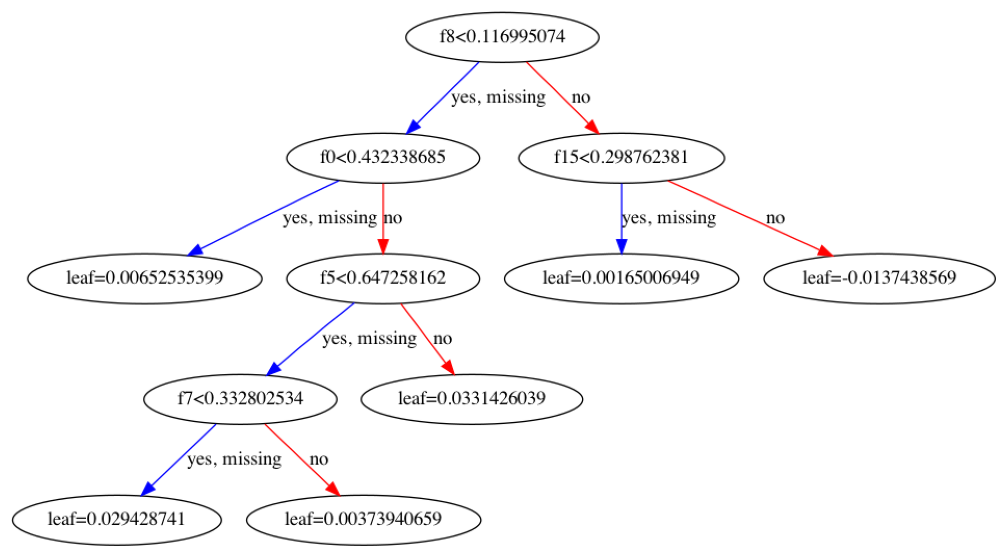

In [94]:
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(xgb_reg, ax=ax)
plt.show()

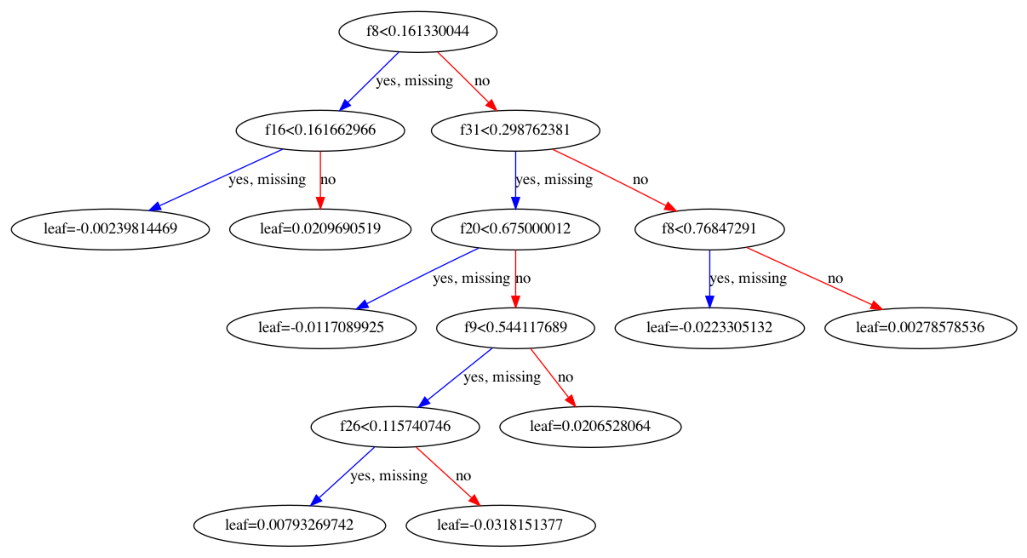

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(xgb_reg2, ax=ax)
plt.show()

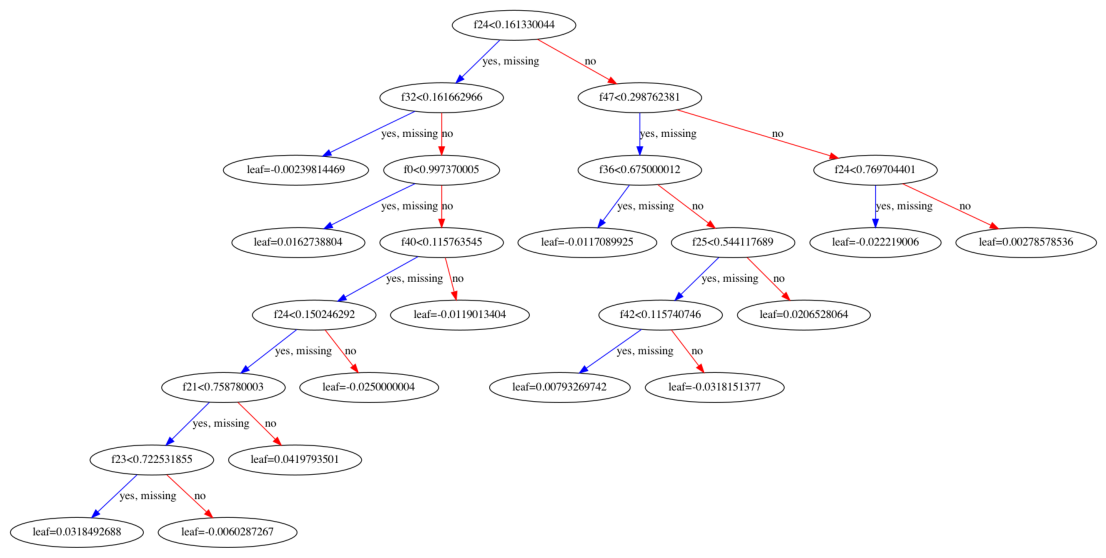

In [96]:
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(xgb_reg3, ax=ax)
plt.show()

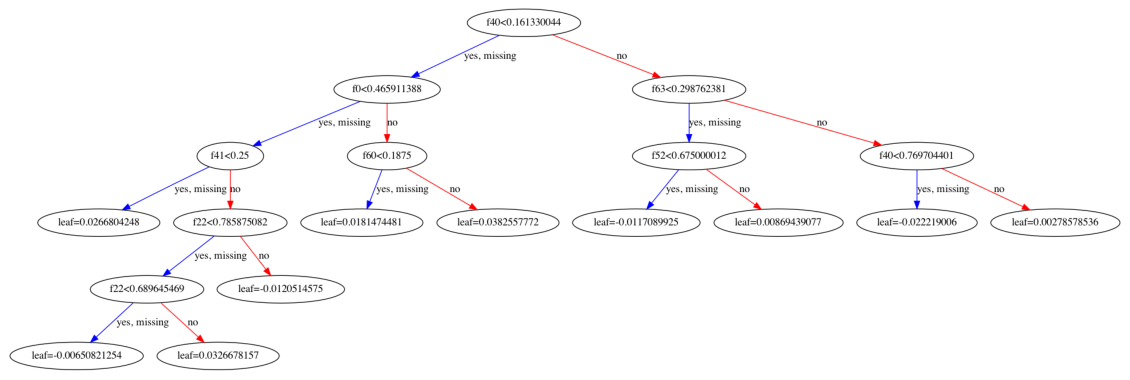

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_tree(xgb_reg4, ax=ax)
plt.show()

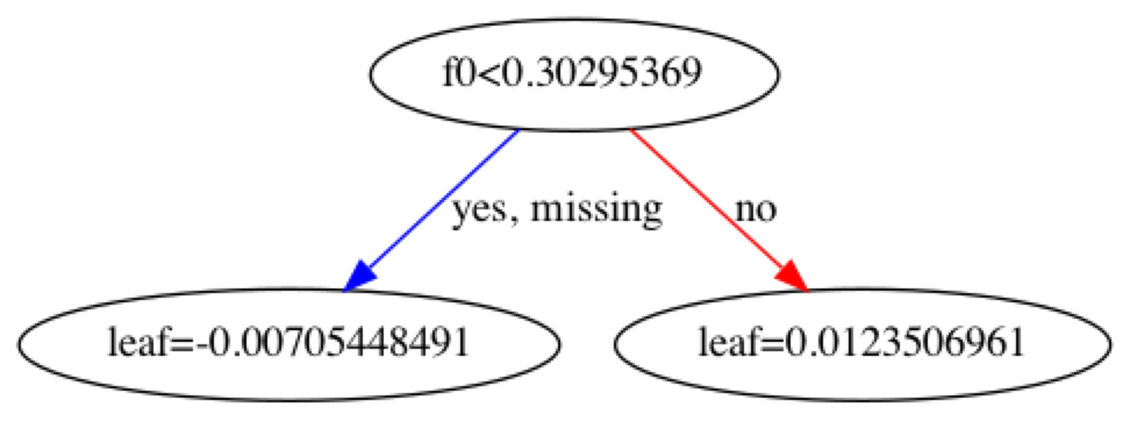

In [110]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgb_reg_uni, ax=ax)
plt.show()

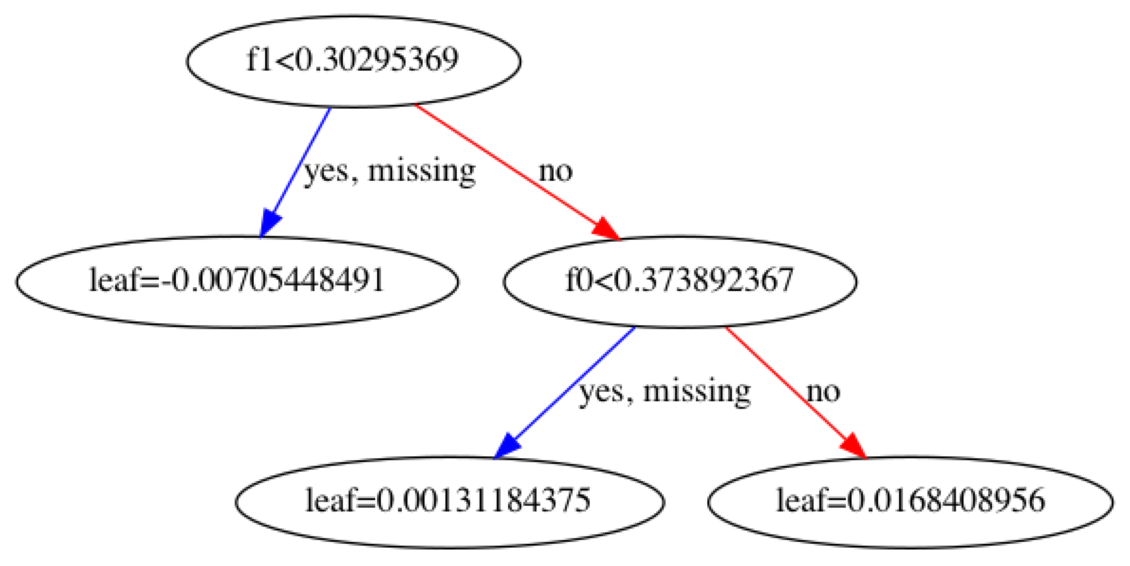

In [111]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgb_uni_reg2, ax=ax)
plt.show()

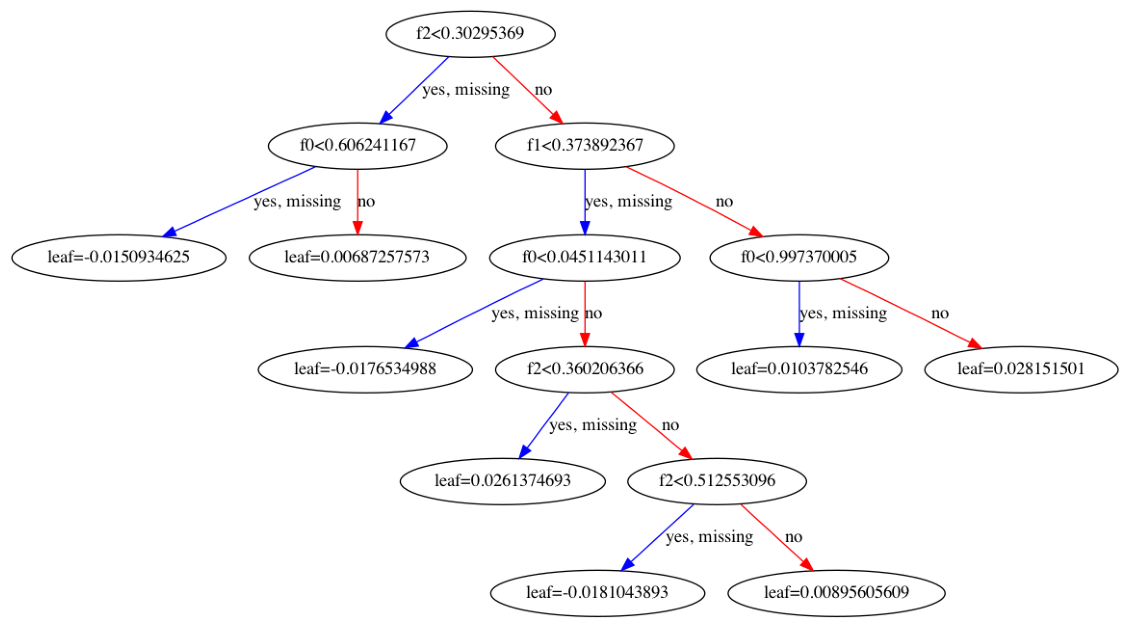

In [87]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgb_uni_reg3, ax=ax)
plt.show()

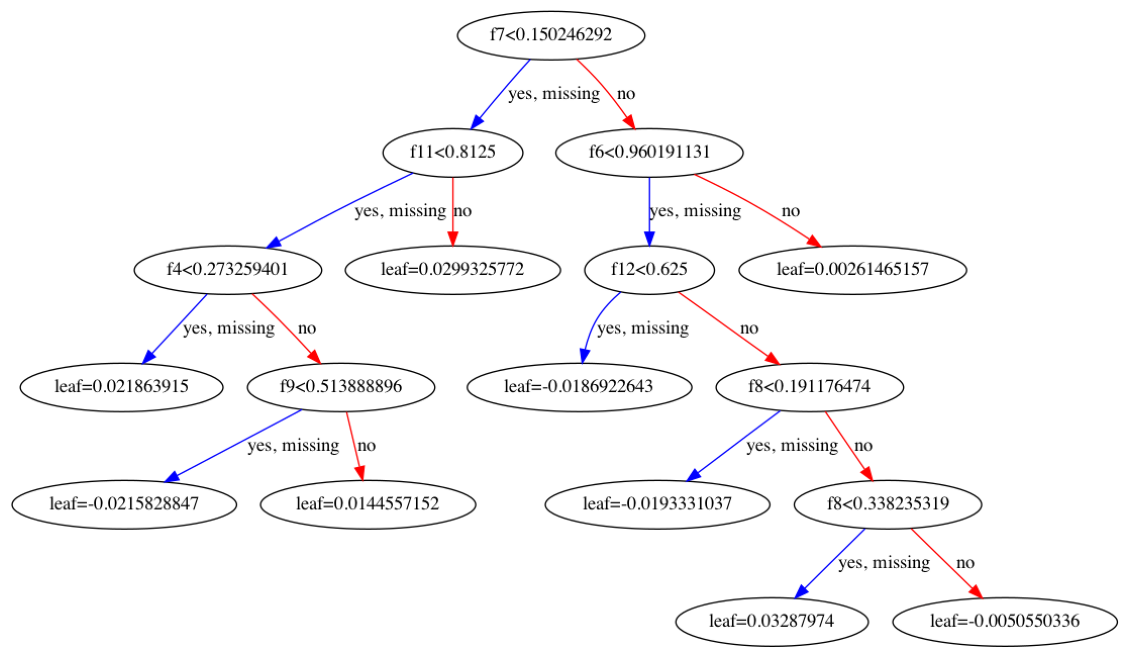

In [120]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgb_reg_no, ax=ax)
plt.show()

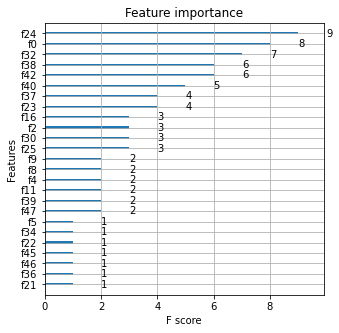

In [127]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb_reg3)
pyplot.show()